In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pickle
import pandas as pd
from tqdm import tqdm 

## Important Function 

In [2]:
class Data:
    def __init__(self, array_list):
        self.array_list = array_list

    def save(self, filename):
        with open(filename, 'wb') as f:
            pickle.dump(self.array_list, f)

    @classmethod
    def load(cls, filename):
        with open(filename, 'rb') as f:
            array_list = pickle.load(f)
        return cls(array_list)

## Plain MD

In [3]:
plain_md_path = '../Plain_MD/analysis'

error_loaded = Data.load(f"{plain_md_path}/population_data/error_8_conform.pkl").array_list
errors = error_loaded[0]

plain_md_errors = errors
plain_md_errors.shape

(8, 345495)

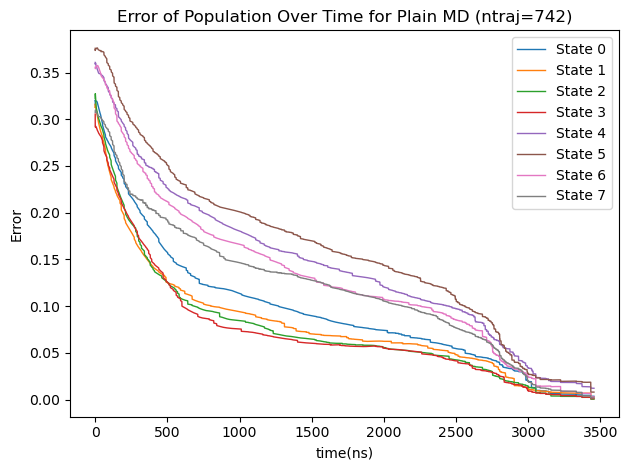

In [4]:
conform_num = 8
T = plain_md_errors.shape[1]
x = np.arange(T)
dt_in_ns = 0.01

for i in range(conform_num):
    errors = plain_md_errors[i]

    plt.plot(x * dt_in_ns, errors, label=f"State {i}", linewidth=1)

plt.xlabel("time(ns)")
plt.ylabel("Error")
#plt.ylim(-0.1, 0.1)
plt.title("Error of Population Over Time for Plain MD (ntraj=742)")
plt.legend(loc='best')
plt.tight_layout()
plt.show()


## Error 

In [5]:
ee_path = '../EE/analysis'

error_loaded = Data.load(f"{ee_path}/population_data/error_8_conform.pkl").array_list
errors = error_loaded[0]

ee_errors = errors
ee_errors.shape

(8, 91002)

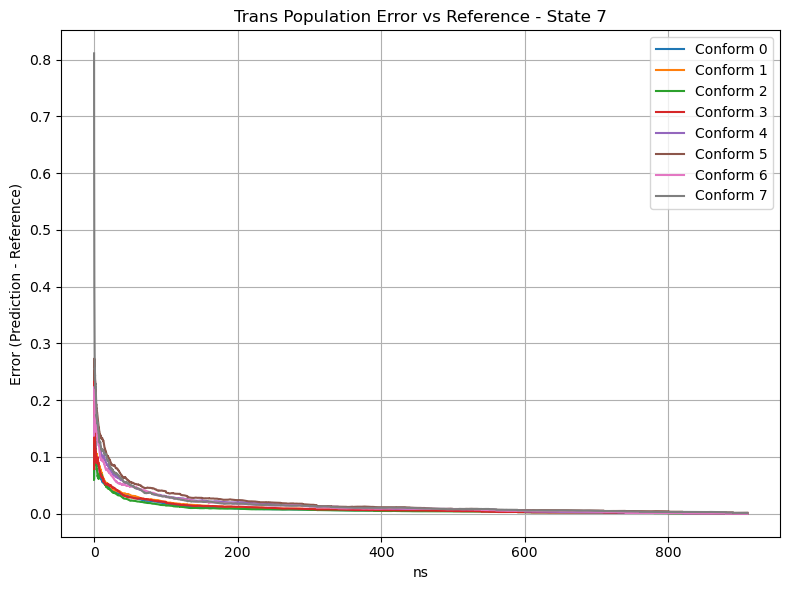

In [6]:


dt_in_ns = 0.01 #10 ps
time_step_to_show = 200 # 100 ns

plt.figure(figsize=(8, 6))  
for conform in range(conform_num):  # Loop over 8 conformational states
    x = np.arange(ee_errors.shape[1])

    plt.plot(x * dt_in_ns, ee_errors[conform, :], label=f'Conform {conform}')
plt.title(f'Trans Population Error vs Reference - State {conform}')
plt.xlabel('ns')
plt.ylabel('Error (Prediction - Reference)')
plt.grid(True)
plt.legend()
#plt.ylim(0, 0.15)
plt.tight_layout()
plt.show()


## HREX

In [7]:
hrex_path = '../HREX/analysis'


error_loaded = Data.load(f"{hrex_path}/population_data/error_8_conform.pkl").array_list
errors = error_loaded[0]

hrex_errors = errors
hrex_errors.shape

(6, 8, 600030)

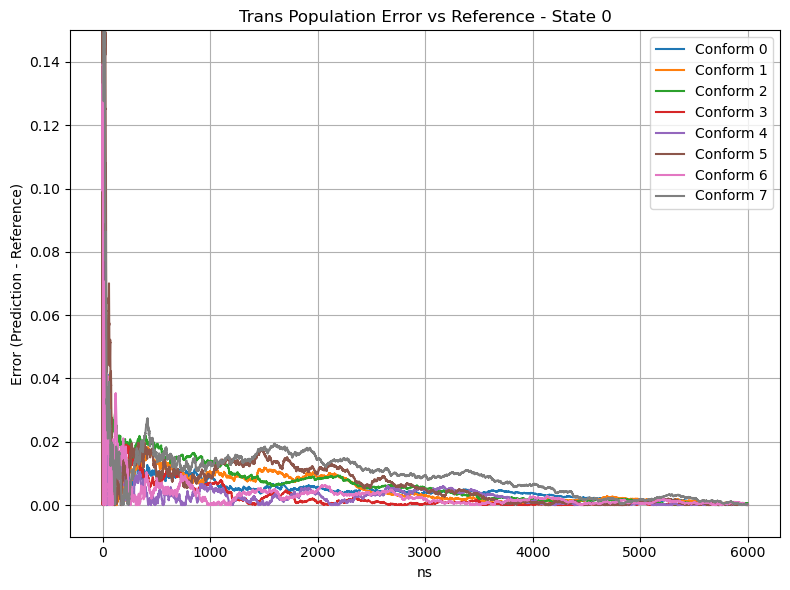

In [8]:
thermo_num = 1
conform_num = 8
dt_in_ns = 0.01 #10 ps
time_step_to_show = 200 # 100 ns

for thermo in range(thermo_num):  # Loop over 6 thermodynamic states

    plt.figure(figsize=(8, 6))  
    for conform in range(conform_num):  # Loop over 8 conformational states
        x = np.arange(hrex_errors.shape[2])
        plt.plot(x * dt_in_ns, hrex_errors[thermo, conform, :], label=f'Conform {conform}')

    plt.title(f'Trans Population Error vs Reference - State {thermo}')
    plt.xlabel('ns')
    plt.ylabel('Error (Prediction - Reference)')
    plt.grid(True)
    plt.legend()
    plt.ylim(-0.01, 0.15)
    plt.tight_layout()
    plt.show()


## REDs

In [9]:
reds_path = '../REDs/analysis'


error_loaded = Data.load(f"{reds_path}/population_data/error_8_conform.pkl").array_list
errors = error_loaded[0]

reds_errors = errors
reds_errors.shape

(3, 8, 337514)

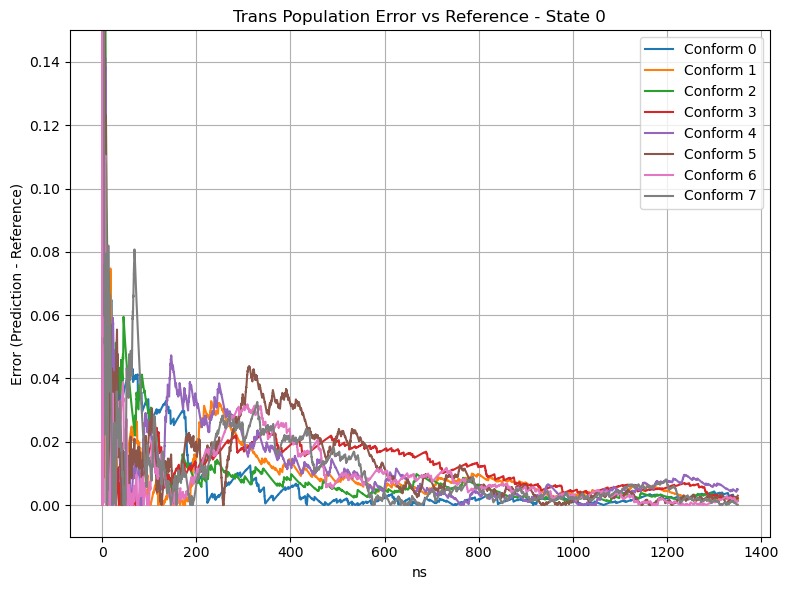

In [10]:
thermo_num = 1
conform_num = 8
dt_in_ns = 0.004 # 4ps

for thermo in range(thermo_num):  # Loop over 6 thermodynamic states
    plt.figure(figsize=(8, 6))

    for conform in range(conform_num):  # Loop over 8 conformational states
        x = np.arange(reds_errors.shape[2])
        plt.plot(x * dt_in_ns, reds_errors[thermo, conform, :], label=f'Conform {conform}')
          
    plt.title(f'Trans Population Error vs Reference - State {thermo}')
    plt.xlabel('ns')
    plt.ylabel('Error (Prediction - Reference)')
    plt.grid(True)
    plt.legend()
    plt.ylim(-0.01, 0.15)
    plt.tight_layout()
    plt.show()


## Combine Plot

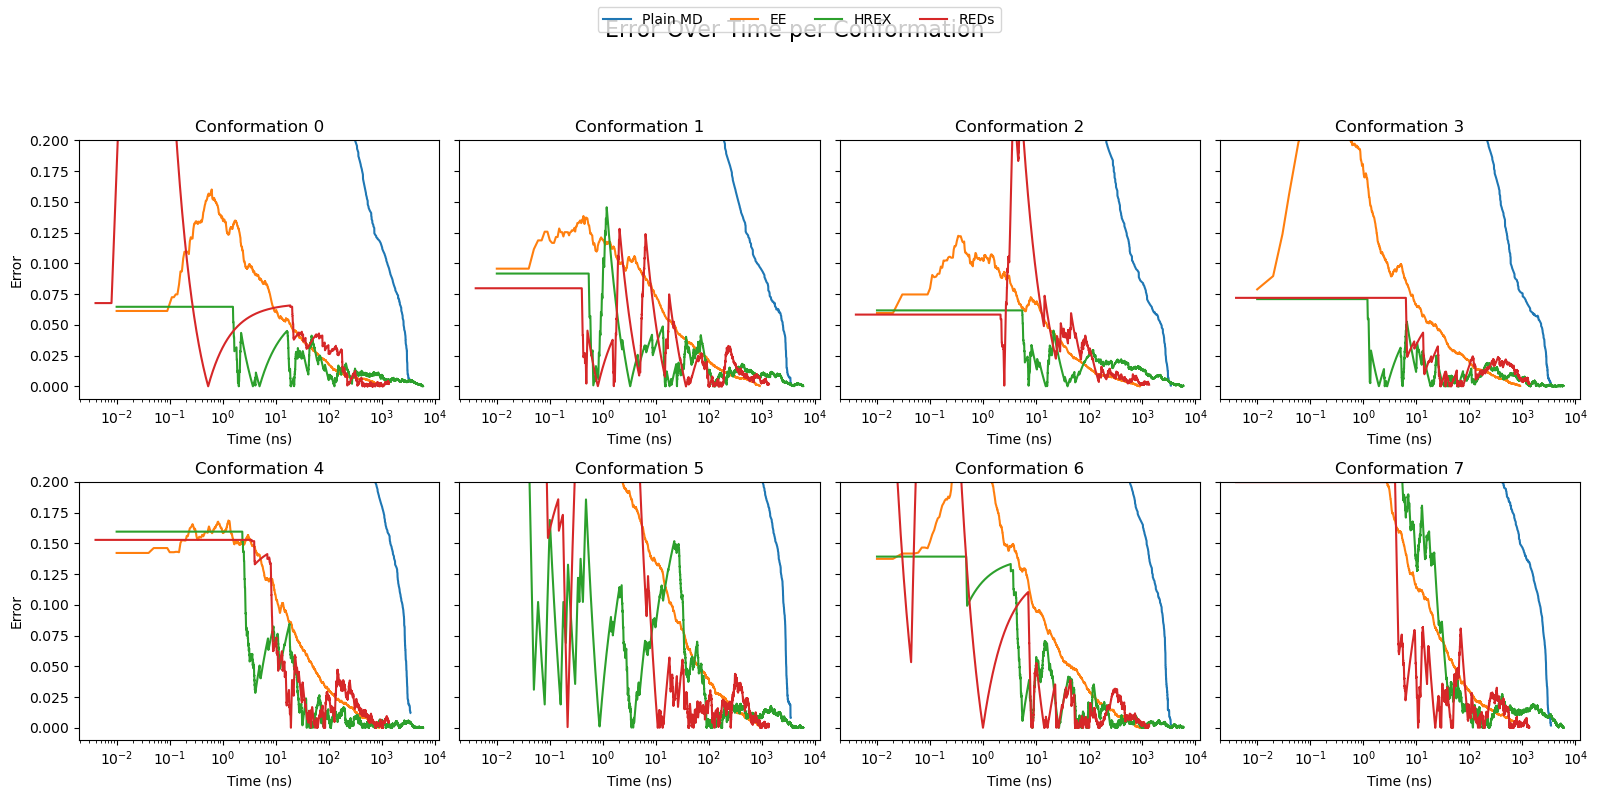

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Optional y-axis range
use_ylim = True
ylim_low = -0.01
ylim_high = 0.2
use_logscale_x = True  # Enable log scale for x-axis

conform_num = 8
colors = ['C0', 'C1', 'C2', 'C3']
method_labels = ['Plain MD', 'EE', 'HREX', 'REDs']

# Time arrays (start from index 1 to avoid log(0))
time_md = np.arange(1, plain_md_errors.shape[1] + 1) * 0.01
time_ee = np.arange(1, ee_errors.shape[1] + 1) * 0.01
time_hrex = np.arange(1, hrex_errors.shape[2] + 1) * 0.01
time_reds = np.arange(1, reds_errors.shape[2] + 1) * 0.004

# Create 2x4 subplots
fig, axes = plt.subplots(2, 4, figsize=(16, 8), sharey=True)
axes = axes.flatten()

for conform in range(conform_num):
    ax = axes[conform]

    # Plot each method's error
    ax.plot(time_md, plain_md_errors[conform], label='Plain MD', color=colors[0])
    ax.plot(time_ee, ee_errors[conform], label='EE', color=colors[1])
    ax.plot(time_hrex, hrex_errors[0, conform], label='HREX', color=colors[2])
    ax.plot(time_reds, reds_errors[0, conform], label='REDs', color=colors[3])

    ax.set_title(f'Conformation {conform}')
    ax.set_xlabel("Time (ns)")
    if conform % 4 == 0:
        ax.set_ylabel("Error")
    if use_logscale_x:
        ax.set_xscale('log')
    if use_ylim:
        ax.set_ylim(ylim_low, ylim_high)

# Shared legend
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=4, fontsize='medium')

plt.suptitle("Error Over Time per Conformation", fontsize=16)
plt.savefig("fig/error_over_time_separate_8_conform_log_scale_plot.pdf", format="pdf")
plt.tight_layout(rect=[0, 0, 1, 0.92])
plt.show()


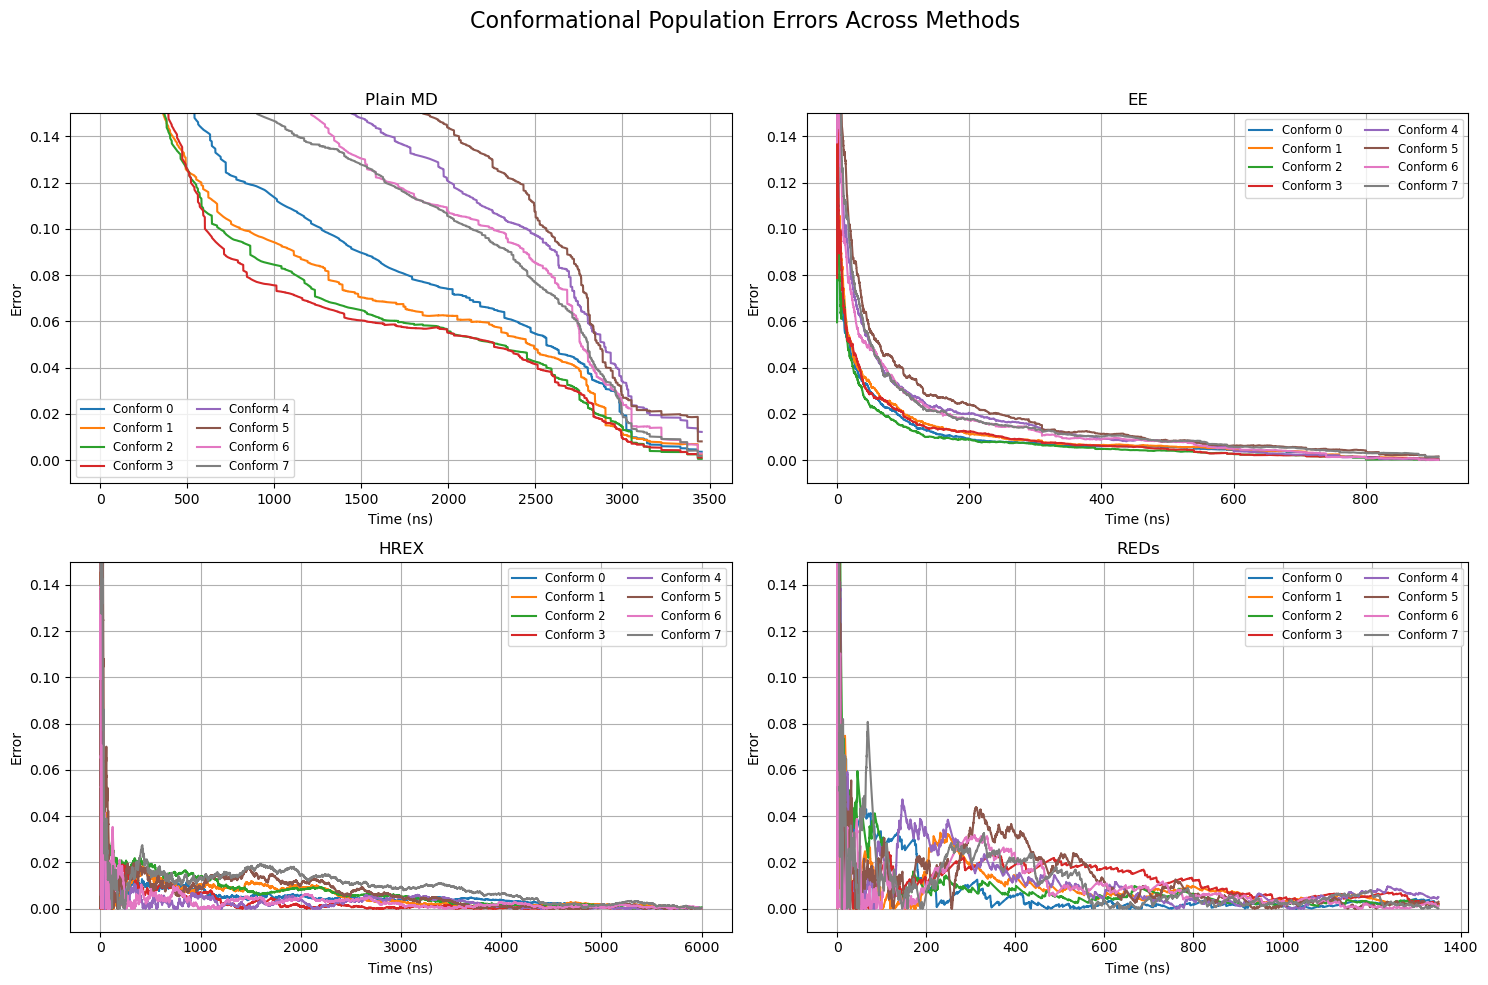

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Optional y-axis range
use_ylim = True
ylim_low = -0.01
ylim_high = 0.15

conform_num = 8

# Create 2x2 subplot grid
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

# -------- Plain MD --------
ax = axes[0]
T = plain_md_errors.shape[1]
x = np.arange(T)
dt_in_ns = 0.01
for i in range(conform_num):
    ax.plot(x * dt_in_ns, plain_md_errors[i], label=f"Conform {i}")
ax.set_title("Plain MD")
ax.set_xlabel("Time (ns)")
ax.set_ylabel("Error")
if use_ylim: ax.set_ylim(ylim_low, ylim_high)
ax.grid(True)
ax.legend(fontsize='small', ncol=2)

# -------- EE --------
ax = axes[1]
dt_in_ns = 0.01
x = np.arange(ee_errors.shape[1])
for conform in range(conform_num):
    ax.plot(x * dt_in_ns, ee_errors[conform, :], label=f"Conform {conform}")
ax.set_title("EE")
ax.set_xlabel("Time (ns)")
ax.set_ylabel("Error")
if use_ylim: ax.set_ylim(ylim_low, ylim_high)
ax.grid(True)
ax.legend(fontsize='small', ncol=2)

# -------- HREX --------
ax = axes[2]
dt_in_ns = 0.01
x = np.arange(hrex_errors.shape[2])
for conform in range(conform_num):
    ax.plot(x * dt_in_ns, hrex_errors[0, conform, :], label=f"Conform {conform}")
ax.set_title("HREX")
ax.set_xlabel("Time (ns)")
ax.set_ylabel("Error")
if use_ylim: ax.set_ylim(ylim_low, ylim_high)
ax.grid(True)
ax.legend(fontsize='small', ncol=2)

# -------- REDs --------
ax = axes[3]
dt_in_ns = 0.004
x = np.arange(reds_errors.shape[2])
for conform in range(conform_num):
    ax.plot(x * dt_in_ns, reds_errors[0, conform, :], label=f"Conform {conform}")
ax.set_title("REDs")
ax.set_xlabel("Time (ns)")
ax.set_ylabel("Error")
if use_ylim: ax.set_ylim(ylim_low, ylim_high)
ax.grid(True)
ax.legend(fontsize='small', ncol=2)

plt.suptitle("Conformational Population Errors Across Methods", fontsize=16)
plt.savefig("fig/error_over_time_all_8_conform_plot.pdf", format="pdf")
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
